In [20]:
import netCDF4 as nc
import numpy as np

import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cm

# Metadata

In [3]:
path = "/media/sf_VM_Folder/data/deLavergne_tidal_mixing_3D_maps.nc"
ds = nc.Dataset(path)

In [4]:
print(ds.__dict__)
print(ds)

{}
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): Longitude(720), Latitude(341), Depth(45), Depth_midpoint(44)
    variables(dimensions): float64 lon(Longitude), float64 lat(Latitude), float64 seafloor_depth(Latitude, Longitude), float64 depth(Depth, Latitude, Longitude), float64 conservative_temperature(Depth, Latitude, Longitude), float64 absolute_salinity(Depth, Latitude, Longitude), float64 gamma_n(Depth, Latitude, Longitude), float64 depth_midpoint(Depth_midpoint, Latitude, Longitude), float64 epsilon_wwi(Depth_midpoint, Latitude, Longitude), float64 epsilon_sho(Depth_midpoint, Latitude, Longitude), float64 epsilon_cri(Depth_midpoint, Latitude, Longitude), float64 epsilon_hil(Depth_midpoint, Latitude, Longitude), float64 epsilon_tid(Depth_midpoint, Latitude, Longitude), float64 buoyancy_frequency_squared(Depth_midpoint, Latitude, Longitude), float64 b_factor(Depth_midpoint, Latitude, Longitude)
    groups: 


In [5]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'Longitude', size = 720
<class 'netCDF4._netCDF4.Dimension'>: name = 'Latitude', size = 341
<class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 45
<class 'netCDF4._netCDF4.Dimension'>: name = 'Depth_midpoint', size = 44


In [7]:
for var in ds.variables.values():
    print(var,'\n')

<class 'netCDF4._netCDF4.Variable'>
float64 lon(Longitude)
    units: longitude degrees
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used 

<class 'netCDF4._netCDF4.Variable'>
float64 lat(Latitude)
    units: latitude degrees
unlimited dimensions: 
current shape = (341,)
filling on, default _FillValue of 9.969209968386869e+36 used 

<class 'netCDF4._netCDF4.Variable'>
float64 seafloor_depth(Latitude, Longitude)
    units: m
unlimited dimensions: 
current shape = (341, 720)
filling on, default _FillValue of 9.969209968386869e+36 used 

<class 'netCDF4._netCDF4.Variable'>
float64 depth(Depth, Latitude, Longitude)
    units: m
unlimited dimensions: 
current shape = (45, 341, 720)
filling on, default _FillValue of 9.969209968386869e+36 used 

<class 'netCDF4._netCDF4.Variable'>
float64 conservative_temperature(Depth, Latitude, Longitude)
    units: Celsius degrees
unlimited dimensions: 
current shape = (45, 341, 720)
filling on, defa

* float Ef(ny, nx) ; total conversion in M2
* float Ef8c(ny, nx) ; total conversion into first 8 components 
* float Efn(ny, nx, nmodes) ; conversion in M2 mode by mode (first 10 modes) 
* float Efn8c(ny, nx, nmodes) ; conversion into first 8 components (first 10 modes) 
* float lon(ny, nx) ; longitude 
* float lat(ny, nx) ; latitude 
* float h(ny, nx) ; grid bathymetry 

In [202]:
lat = ds.variables['lat'][:] # latitude grid points
lon = ds.variables['lon'][:] # longitude grid points
depth = ds.variables['depth_midpoint'][:] # depth grid points
seafloor_depth = ds.variables['seafloor_depth'][:]

epsilon_cri = ds.variables['epsilon_sho']
epsilon_sho = ds.variables['epsilon_sho'] #.filled(np.nan)
epsilon_wwi = ds.variables['epsilon_wwi'] #.filled(np.nan)
epsilon_hil = ds.variables['epsilon_hil']
epsilon_tid = ds.variables['epsilon_tid']

print(f"{lon.shape = }")#, {lon[0]:.1f}, {lon[-1]:.1f}")
print(f"{lat.shape = }")#, {lat[0]:.1f}, {lat[-1]:.1f}")
print(f"{depth.shape = }")#, {depth[0]}, {depth[-1]:.1f}")
print(f"{epsilon_tid.shape = }")
#print(f"Shape of Efn8c:   {Efn8c.shape}")

lon.shape = (720,)
lat.shape = (341,)
depth.shape = (44, 341, 720)
epsilon_tid.shape = (44, 341, 720)


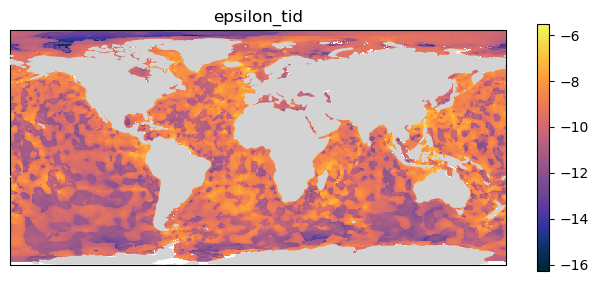

In [19]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=1, zorder = 10)
#im = ax.pcolormesh(lon, lat, t, transform=ccrs.PlateCarree(), cmap = cm.cm.balance, norm = mcolors.SymLogNorm(linthresh = 1e-8, vmin = - np.nanmax(np.abs(t)), vmax = np.nanmax(np.abs(t))))
im = ax.pcolormesh(lon, lat, np.log10(epsilon_tid[0,:,:]), transform= ccrs.PlateCarree(), cmap = cm.cm.thermal)
#plt.title(r"$q = E^{4-\infty}_{M2} / E^{1-\infty}_{M2}$")
plt.title(r"epsilon_tid")
plt.colorbar(im, orientation='vertical', shrink = 0.4);
#plt.savefig("./output2.png", bbox_inches = "tight", dpi = 300)

# Plot Southern Ocean 

In [22]:
def setup_south_polar(fig):
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

    # Limit the map to -60 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

    # Add land and ocean features to the map
    ax.add_feature(cfeature.LAND, color="grey")
    # ax.add_feature(cfeature.OCEAN)

    # Draw gridlines on the map
    # If labels are drawn, can be chosen here
    ax.gridlines(draw_labels=False)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    # Set the circular boundary for the map using the transformed circle path
    ax.set_boundary(circle, transform=ax.transAxes)    
    
    return ax

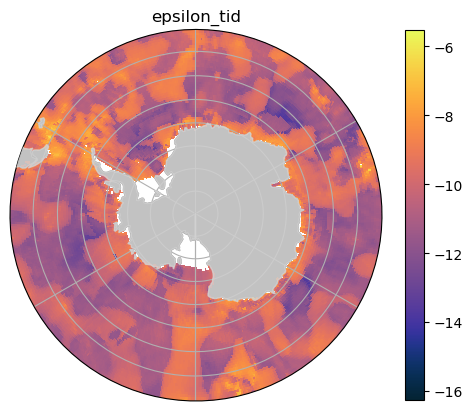

In [24]:
fig = plt.figure(figsize=[6, 6])
ax = setup_south_polar(fig)
im = ax.pcolormesh(lon, lat, np.log10(epsilon_tid[0,:,:]), transform= ccrs.PlateCarree(), cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.8, zorder = 10)
plt.title(r"epsilon_tid")
plt.colorbar(im, orientation='vertical', shrink = 0.7);
#plt.savefig("./output2.png", bbox_inches = "tight", dpi = 300)

# Weddell Sea

In [25]:
def setup_Weddell_Sea(fig):
    
    # Import the necessary libraries
    import matplotlib.pyplot as plt
    import matplotlib.path as mpath
    import cartopy.mpl.patch as cpatch
    import matplotlib.patches as patches
    import matplotlib.ticker as mticker

    # Define the projection for a high-resolution South Polar Stereographic map
    high_res_proj = ccrs.SouthPolarStereo(central_longitude=-50)
    high_res_proj.threshold = 1e3

    ax = fig.add_subplot(111, projection=high_res_proj)
    ax.add_feature(cfeature.LAND, color="grey")

    # Define the limits for the x-axis and y-axis of the map
    xlim = [-80, -20] # longitude
    ylim = [-60, -80] # latitude

    # Define a rectangular path for the map extent using matplotlib's Path object
    rect = mpath.Path([[xlim[0], ylim[0]],
                       [xlim[1], ylim[0]],
                       [xlim[1], ylim[1]],
                       [xlim[0], ylim[1]],
                       [xlim[0], ylim[0]],
                       ])

    # Transform the rectangular path to the data coordinate system
    proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
    rect_in_target = proj_to_data.transform_path(rect)

    # Set the boundary of the map using the transformed rectangular path
    ax.set_boundary(rect_in_target)

    # Configure gridlines for the map
    gl = ax.gridlines(
        draw_labels=["top", "right", "x", "y"],
        rotate_labels=True, x_inline=False)

    # Draw latitude and longitude gridlines (and their labels)
    # only at the specified values
    lathelp = np.arange(-75, -60, 5)
    gl.ylocator = mticker.FixedLocator(lathelp)
    lonhelp = np.arange(-80, -10, 10)
    gl.xlocator = mticker.FixedLocator(lonhelp)

    # Rotate the longitude labels to be more readable
    gl.xlabel_style = {'rotation': 30}

    # To make sure that all of the wanted map extent is visible in the figure,
    # (especially because the chosen map projections differs strongly
    # at the poles from the PlateCarree Projection)
    # this hack of adding a constant is needed and may need be adjusted,
    # dependent on your map extent and figure size
    ax.set_extent([xlim[0], xlim[1], ylim[0] + 4, ylim[1]])

    return ax

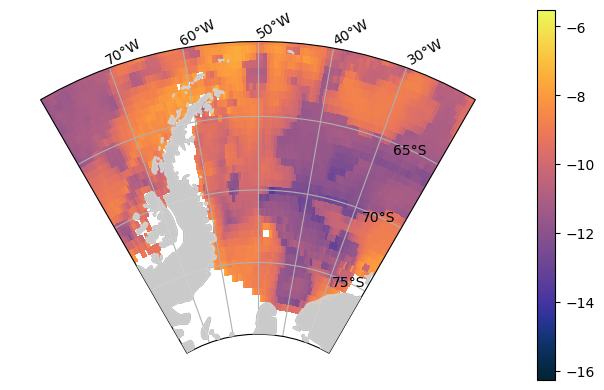

In [26]:
# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(8, 8))
ax = setup_Weddell_Sea(fig)
im = ax.pcolormesh(lon, lat, np.log10(epsilon_tid[0,:,:]), transform= ccrs.PlateCarree(), cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.9, zorder = 10)
plt.colorbar(im, orientation='vertical', shrink = 0.6);

# Transect Sideview 

In [37]:
import xarray as xr

In [210]:
# Define lat, lon coordinates for the transect
start_coords = (-63.40, -52.29)
end_coords = (-64.22, -47.49)

# Generate the transect points
num_points = 100
transect_lats = np.linspace(start_coords[0], end_coords[0], num_points)
transect_lons = np.linspace(start_coords[1], end_coords[1], num_points)

In [258]:
# Load the netCDF file using xarray
file_path = "/media/sf_VM_Folder/data/deLavergne_tidal_mixing_3D_maps.nc"
ds = xr.open_dataset(file_path)

# Extract the necessary data arrays
lons = ds['lon']
lats = ds['lat']
depths = ds['depth_midpoint']
epsilon_tid = ds['epsilon_tid']
seafloor_depth = ds['seafloor_depth']

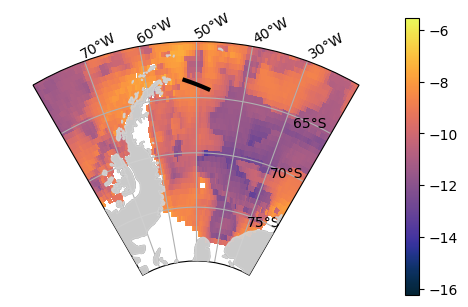

In [212]:
# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(6, 6))
ax = setup_Weddell_Sea(fig)
im = ax.pcolormesh(lons, lats, np.log10(epsilon_tid[0,:,:]), transform= ccrs.PlateCarree(), cmap = cm.cm.thermal)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.9, zorder = 10)
plt.colorbar(im, orientation='vertical', shrink = 0.6);
ax.plot(transect_lons,transect_lats, "k", lw = 3, transform= ccrs.PlateCarree(), zorder = 10)

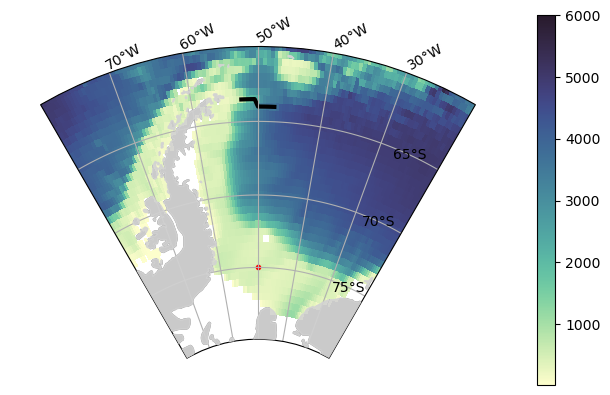

In [261]:
# Create a new figure and subplot with the specified projection
fig = plt.figure(figsize=(8, 8))
ax = setup_Weddell_Sea(fig)
im = ax.pcolormesh(lons, lats, seafloor_depth, transform= ccrs.PlateCarree(), cmap = cm.cm.deep)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.9, zorder = 10)
plt.colorbar(im, orientation='vertical', shrink = 0.6);
ax.plot(transect_lons,transect_lats, "k", lw = 3, transform= ccrs.PlateCarree())
ax.plot(-50, -75, "r.", transform= ccrs.PlateCarree())

In [325]:
def get_profile(lat,lon):
    # Interpolate to find the nearest grid points to the specified lat, lon coordinates
    new_lon = (lon + 360)%360 # transform from (-180, 180) to (0, 360)
    
    nearest_lat_idx = np.array(np.abs(lats - lat).argmin())
    nearest_lon_idx = np.array(np.abs(lons - new_lon).argmin())
    return [
        float(lats[nearest_lat_idx]), 
        np.array(lons[nearest_lon_idx])- 360, 
        depths[:,nearest_lat_idx,nearest_lon_idx], 
        epsilon_tid[:,nearest_lat_idx,nearest_lon_idx], 
        np.array(seafloor_depth[nearest_lat_idx,nearest_lon_idx])
    ]

10 620
489.758114157184


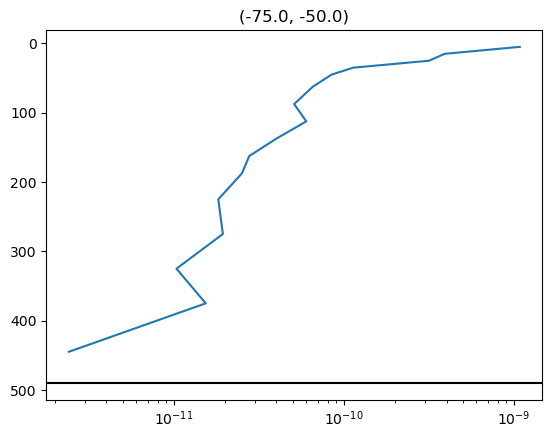

In [314]:
# Specify the coordinates for the vertical profile
lat = -75.0
lon = -50.0 
grid_lat, grid_lon, depth, profile, seafloor = get_profile(lat,lon)
plt.semilogx(profile, depth)
plt.axhline(seafloor, c="k")
plt.gca().invert_yaxis()
plt.title(f"{grid_lat,grid_lon}")
print(seafloor)

In [326]:
# Define lat, lon coordinates for the transect
start_coords = (-63.40, -52.29)
end_coords = (-64.22, -47.49)

# Generate the transect points
num_points = 100
desired_lats = np.linspace(start_coords[0], end_coords[0], num_points)
desired_lons = np.linspace(start_coords[1], end_coords[1], num_points)

transect_eps = []
transect_depth = []
transect_lats = []
transect_lons = []
transect_seafloor = []
for lat, lon in zip(desired_lats, desired_lons):
    grid_lat, grid_lon, depth, profile, seafloor = get_profile(lat,lon)
    if not (grid_lat in transect_lats and grid_lon in transect_lons):
        transect_lats.append(grid_lat)
        transect_lons.append(grid_lon)
        transect_eps.append(np.array(profile))
        transect_depth.append(np.array(depth))
        transect_seafloor.append(seafloor)

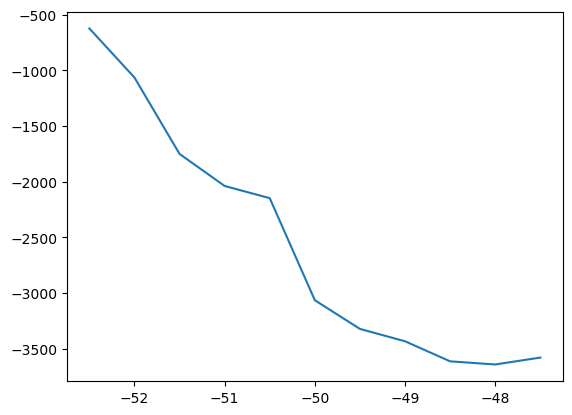

In [327]:
plt.plot(transect_lons, -1*np.array(transect_seafloor))

In [331]:
depth_axis =   np.array([   5.        ,   15.        ,   25.        ,   35.        ,
          45.        ,   62.5       ,   87.5       ,  112.5       ,
         137.5       ,  162.5       ,  187.5       ,  225.        ,
         275.        ,  325.        ,  375.        ,  450.        ,
         550.        ,  650.        ,  750.        ,  850.        ,
         950.        , 1050.        , 1150.        , 1250.        ,
        1350.        , 1450.        , 1625.        , 1875.        ,
        2125.        , 2375.        , 2625.        , 2875.        ,
        3125.        , 3375.        , 3540])

data_len = len(depth_axis)
cut_transect_eps = [p[:data_len] for p in transect_eps]

In [372]:
import pandas as pd
df_transect_eps = pd.DataFrame(cut_transect_eps)
df_transect_eps.shape

(11, 35)

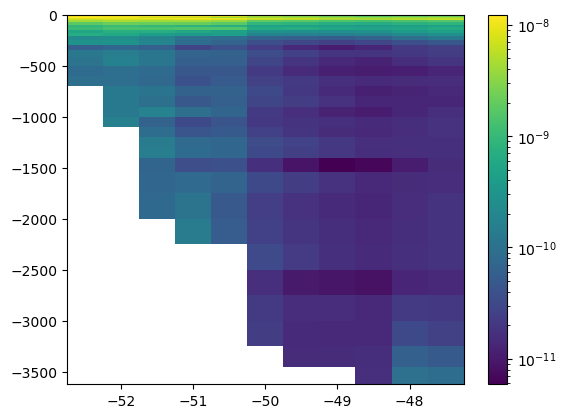

In [373]:
cb = plt.pcolormesh(transect_lons, -depth_axis , df_transect_eps.T, shading='nearest', norm = "log")
plt.colorbar(cb)

# Conversion from z to terrain-following coordinates

In [398]:
transect_mab = []
for p in transect_depth:
    last_non_nan_index = np.argmax(np.isnan(p))-1
    last_non_nan_value = p[last_non_nan_index]
    mabs = last_non_nan_value - p 
    transect_mab.append(mabs)
df_transect_mab = pd.DataFrame(transect_mab)
df_transect_mab = df_transect_mab.dropna(axis=1, how='all')
df_transect_mab = df_transect_mab.fillna(0)

In [403]:
df_transect_eps

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3.024643e-09,1.107916e-08,1.231663e-08,8.499255e-09,5.933804e-09,4.133466e-09,1.820910e-09,8.696710e-10,1.060031e-09,5.411204e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.861970e-09,1.141420e-08,9.759627e-09,9.614254e-09,7.062860e-09,4.495980e-09,2.214436e-09,1.074973e-09,1.318134e-09,7.318669e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.861804e-10,1.032052e-08,7.037767e-09,9.591624e-09,7.161226e-09,4.196261e-09,2.134191e-09,9.680060e-10,1.333187e-09,6.843615e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.079103e-10,1.024763e-08,6.065103e-09,1.051344e-08,8.219954e-09,4.210452e-09,2.092787e-09,8.200319e-10,1.448886e-09,5.799728e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.528052e-10,8.256878e-09,4.095294e-09,9.446774e-09,7.894703e-09,3.584941e-09,1.809549e-09,7.026900e-10,1.506287e-09,4.752330e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.689501e-09,4.123524e-09,4.001780e-09,7.215745e-09,5.774392e-09,1.869194e-09,8.650861e-10,4.758644e-10,6.176630e-10,2.870188e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.004991e-09,3.146091e-09,4.120787e-09,6.412808e-09,5.207712e-09,1.708716e-09,8.171046e-10,4.515847e-10,6.426374e-10,2.609234e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.123710e-10,2.276142e-09,3.781920e-09,5.158380e-09,4.441280e-09,1.417611e-09,7.177677e-10,4.046154e-10,5.477904e-10,2.596855e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.761944e-10,1.820314e-09,3.378113e-09,4.761898e-09,4.303504e-09,1.277697e-09,6.812778e-10,3.643611e-10,4.908460e-10,2.877566e-10,...,1.658840e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.312637e-09,2.027186e-09,3.656044e-09,5.307457e-09,5.042552e-09,1.418525e-09,7.773339e-10,4.262196e-10,5.316910e-10,3.858911e-10,...,9.979529e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
row_numbers = len(df_transect_mab.columns)
df_transect_lons = transect_lons
df_transect_lons = pd.DataFrame({f'{i}': [lon] * row_numbers for i, lon in enumerate(transect_lons)})
df_transect_eps = pd.DataFrame(transect_eps)
df_transect_eps = df_transect_eps.dropna(axis=1, how='all')

In [407]:
df_transect_lons.T.shape, df_transect_mab.shape, df_transect_eps.shape

((11, 35), (11, 35), (11, 35))

/tmp/ipykernel_5576/3808663651.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cb = plt.pcolormesh(df_transect_lons.T, df_transect_mab , df_transect_eps, shading='nearest', norm = "log")


(0.0, 700.0)

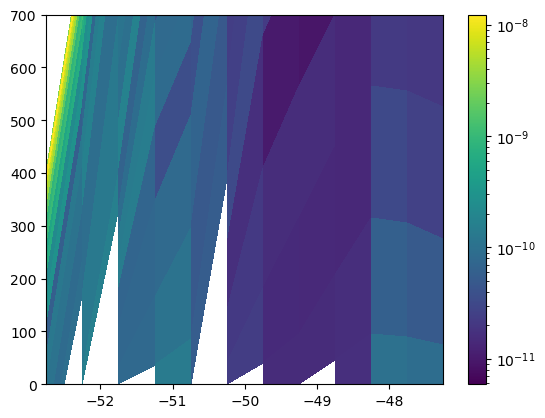

In [411]:
cb = plt.pcolormesh(df_transect_lons.T, df_transect_mab , df_transect_eps, shading='nearest', norm = "log")
plt.colorbar(cb)
plt.gca().set_ylim(0,700)

## info
`epsilon_tid` is defined on depth midpoints, on a z-level grid. Shifting the perspective to be in meters above the sea floor, leads to slanted grid cells. White triangles stem from large depth differences between gridpoints. 

In [416]:
# read eps_IGW results from IDEMIX method
eps_IGW_IDEMIX_df = pd.read_csv("../scripts/IDEMIX_parametrization/method_data/eps_IGW_IDEMIX_results.csv")

In [417]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd
import scipy.stats as ss
from matplotlib.markers import MarkerStyle
import cmocean
cmap = cmocean.cm.solar

ONE_COLUMN_WIDTH = 8.3
TWO_COLUMN_WIDTH = 12
GOLDEN_RATIO = 1.61
cm = 1/2.54  # centimeters in inches

/tmp/ipykernel_5576/5413024.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mpp = ax.pcolormesh(df_transect_lons.T, df_transect_mab , df_transect_eps, shading='nearest', norm = mcolors.LogNorm(vmin=1e-11, vmax=1e-8))


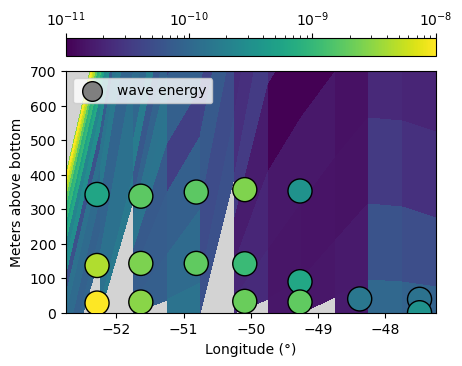

In [422]:
fig,ax = plt.subplots(1, figsize=(TWO_COLUMN_WIDTH*cm, 0.8*TWO_COLUMN_WIDTH*cm))

mpp = ax.pcolormesh(df_transect_lons.T, df_transect_mab , df_transect_eps, shading='nearest', norm = mcolors.LogNorm(vmin=1e-11, vmax=1e-8))
cb = plt.colorbar(mpp, ax=ax, location="top") 

ax.scatter(
    eps_IGW_IDEMIX_df["lon"],
    eps_IGW_IDEMIX_df["rounded_mab"],
    c=eps_IGW_IDEMIX_df["eps_IGW"],
    norm = mcolors.LogNorm(vmin=1e-11, vmax=1e-8), #TODO
    edgecolor="black",
    marker=MarkerStyle("o"),
    s = 300,
    zorder = 10
)

ax.set_facecolor('lightgrey')
ax.set_ylabel("Meters above bottom")
ax.set_xlabel("Longitude (°)")

# ------------------------------------------------------------------------------------------
# for the legend
# eps_IGW IDEMIX icon
ax.scatter(
    eps_IGW_IDEMIX_df["lon"],
    eps_IGW_IDEMIX_df["rounded_mab"],
    #c=energy_levels["eps"],
    color = "tab:gray",
    edgecolor="black",
    marker=MarkerStyle("o"),
    s = 200,
    zorder = -10,    
    label = "wave energy",
)


ax.legend(loc = "upper left", ncol=3, columnspacing=1)
#ax.annotate('gravity current\nboundary', xy=(-48.8, 130), xytext=(-48.5, 270), #fontsize=9,
#            arrowprops = dict(facecolor='black', width = 2, shrink=0.05), ha = "center", va = "center", color = "white", bbox=dict(facecolor='black', alpha = 0.8, edgecolor='black', boxstyle='round, pad = 0.5'))

ax.set_ylim(0,700)            
fig.tight_layout()
#fig.savefig("./eps_transect.svg", bbox_inches = "tight")
#fig.savefig("./eps_IGW_comparison.png", dpi = 400, bbox_inches = "tight")
plt.show()



